<a href="https://colab.research.google.com/github/DeniseGGarcia/Projetos/blob/main/Ranking_de_Djs_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from tabulate import tabulate
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
import math
from google.colab import drive
drive.mount('/content/drive', force_remount=True)



Mounted at /content/drive


In [2]:
file_id = '1Cqvt0U93ZFcbeDciiQuLx3CEVTVvDcri'
url = f'https://drive.google.com/uc?id={file_id}&export=download'

djs = pd.read_csv(url)

Ranking de Djs de 2004 a 2017 - 13 anos

In [24]:
djs.head(60)


,Year,Rank,DJ,Change
0,2004,1.0,Tiësto,Re-entry
1,2005,1.0,Paul van Dyk,Up 1
2,2006,1.0,Paul van Dyk,No change
3,2007,1.0,Armin Van Buuren,Up 1
4,2008,1.0,Armin Van Buuren,No change
5,2009,1.0,Armin Van Buuren,No change
6,2010,1.0,Armin Van Buuren,No change
7,2011,1.0,David Guetta,Up 1
8,2012,1.0,Armin Van Buuren,Up 1
9,2013,1.0,Hardwell,Up 5


In [13]:
djs['Rank']

,Rank
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1395,100.0
1396,100.0
1397,100.0
1398,100.0


In [4]:
djs.isnull().sum()

,0
Unnamed: 0,0
Year,0
Rank,43
DJ,43
Change,43


In [5]:
djs.shape

(1400, 5)

In [6]:
djs.dtypes

,0
Unnamed: 0,int64
Year,int64
Rank,float64
DJ,object
Change,object


In [7]:
djs = djs.drop(columns=['Unnamed: 0'])

In [25]:
djs[djs.isnull().any(axis=1)]


,Year,Rank,DJ,Change
324,2006,24.0,NaN,New Entry
882,2004,NaN,NaN,NaN
896,2004,NaN,NaN,NaN
910,2004,NaN,NaN,NaN
924,2004,NaN,NaN,NaN
938,2004,NaN,NaN,NaN
948,2014,NaN,Carnage,New Entry
952,2004,NaN,NaN,NaN
966,2004,NaN,NaN,NaN
980,2004,NaN,NaN,NaN


In [26]:
djs = djs.dropna()


In [10]:
unique_djs = djs["DJ"].nunique()
print(f"Total de DJs: {unique_djs}")


Total de DJs: 356


In [17]:
primeiros = djs[djs['Rank'] == 1]

In [18]:
primeiros

,Year,Rank,DJ,Change
0,2004,1.0,Tiësto,Re-entry
1,2005,1.0,Paul van Dyk,Up 1
2,2006,1.0,Paul van Dyk,No change
3,2007,1.0,Armin Van Buuren,Up 1
4,2008,1.0,Armin Van Buuren,No change
5,2009,1.0,Armin Van Buuren,No change
6,2010,1.0,Armin Van Buuren,No change
7,2011,1.0,David Guetta,Up 1
8,2012,1.0,Armin Van Buuren,Up 1
9,2013,1.0,Hardwell,Up 5


In [21]:
dj_mais_frequente = primeiros["DJ"].value_counts().idxmax()  # Retorna o DJ que mais apareceu
quantidade = primeiros["DJ"].value_counts().max()  # Retorna a quantidade de vezes que ele apareceu

print(f"O DJ que mais apareceu em primeiro lugar em 13 anos foi {dj_mais_frequente}, com {quantidade} aparições.")


O DJ que mais apareceu em primeiro lugar em 13 anos foi Armin Van Buuren, com 5 aparições.


In [27]:
dj_mais_frequente = djs["DJ"].value_counts().idxmax()  # Retorna o DJ que mais apareceu
quantidade = djs["DJ"].value_counts().max()  # Retorna a quantidade de vezes que ele apareceu

print(f"O DJ que mais apareceu foi {dj_mais_frequente}, com {quantidade} aparições.")


O DJ que mais apareceu foi ATB, com 14 aparições.


In [34]:
top_20_djs = djs["DJ"].value_counts().head(20)
print(f'Tp 20 djs: {top_20_djs}')


Tp 20 djs: DJ
ATB                  14
Carl Cox             14
Above & Beyond       14
Tiësto               14
Armin Van Buuren     14
Paul van Dyk         14
Ferry Corsten        14
David Guetta         13
Richie Hawtin        13
Markus Schulz        12
Steve Angello        12
Umek                 11
Eric Prydz           11
Infected Mushroom    11
Fedde Le Grand       11
Deadmau5             10
Aly & Fila           10
Paul Oakenfold       10
Daft Punk            10
Sander Van Doorn     10
Name: count, dtype: int64


In [30]:
print(djs[djs["Change"] == "Re-entry"]["Year"].value_counts())


Year
2007    12
2004    10
2005     8
2017     7
2009     6
2013     6
2016     6
2006     4
2015     3
2010     2
2014     1
Name: count, dtype: int64


<ipython-input-49-7cede64831c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=djs["DJ"].value_counts().head(20).values,


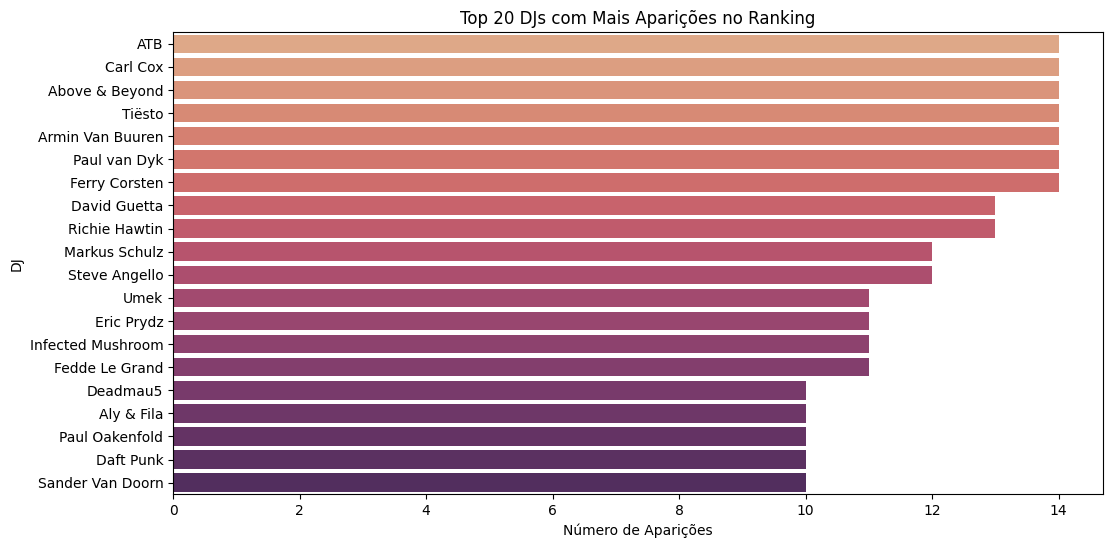

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x=djs["DJ"].value_counts().head(20).values,
            y=djs["DJ"].value_counts().head(20).index,
            palette="flare")
plt.xlabel("Número de Aparições")
plt.ylabel("DJ")
plt.title("Top 20 DJs com Mais Aparições no Ranking")
plt.show()

In [39]:
top1_count = djs[djs["Rank"] == 1]["DJ"].value_counts()
print(top1_count)

DJ
Armin Van Buuren             5
Paul van Dyk                 2
Hardwell                     2
Martin Garrix                2
Tiësto                       1
David Guetta                 1
Dimitri Vegas & Like Mike    1
Name: count, dtype: int64


<ipython-input-51-930adbbcea5b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top1_count.values, y=top1_count.index, palette="colorblind")


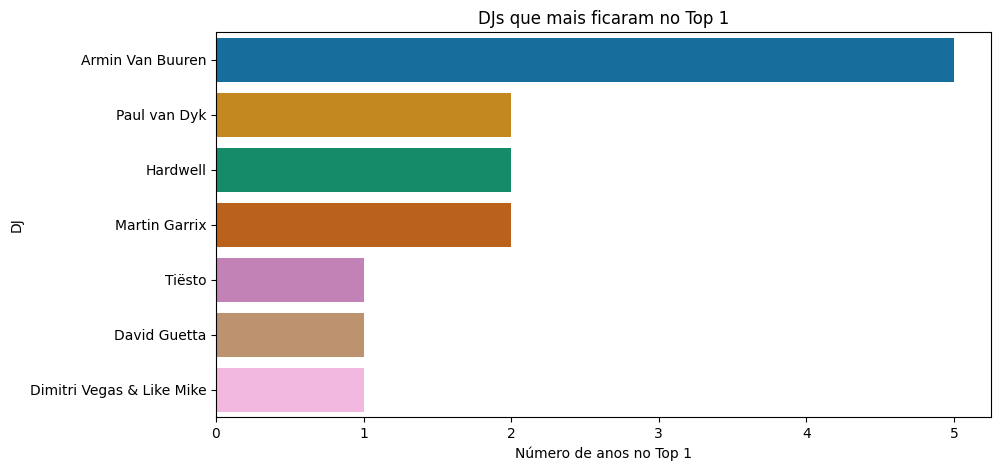

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top1_count.values, y=top1_count.index, palette="colorblind")
plt.xlabel("Número de anos no Top 1")
plt.ylabel("DJ")
plt.title("DJs que mais ficaram no Top 1")
plt.show()

In [42]:
df_reentry = djs[djs["Change"] == "Re-entry"]["DJ"].value_counts()
print(df_reentry.head(10))  # Top 10 que mais voltaram ao ranking


DJ
DJ Dan              2
Martin Solveig      2
Boy George          2
Andy C              2
Skazi               2
Sasha               1
Eddie Halliwell     1
Marco V             1
The Chainsmokers    1
Deep Dish           1
Name: count, dtype: int64


<ipython-input-52-ec27104cfbf6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_reentry.head(10).values, y=df_reentry.head(10).index, palette="colorblind")


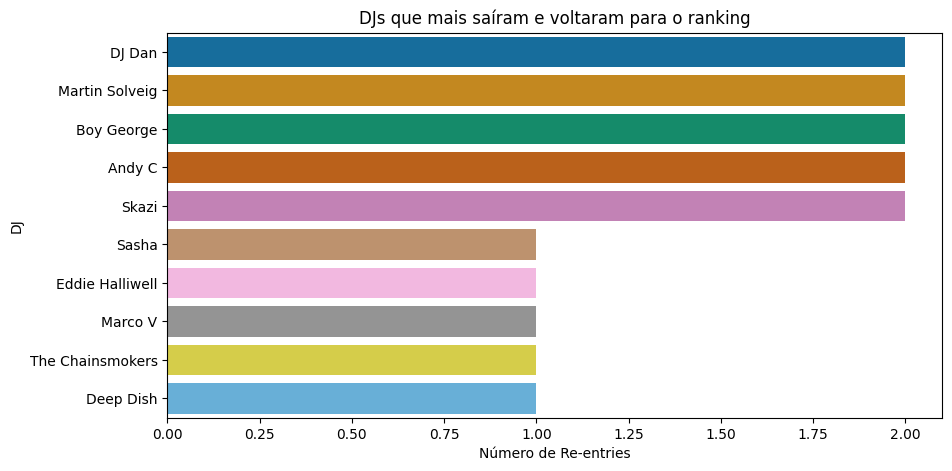

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_reentry.head(10).values, y=df_reentry.head(10).index, palette="colorblind")
plt.xlabel("Número de Re-entries")
plt.ylabel("DJ")
plt.title("DJs que mais saíram e voltaram para o ranking")
plt.show()


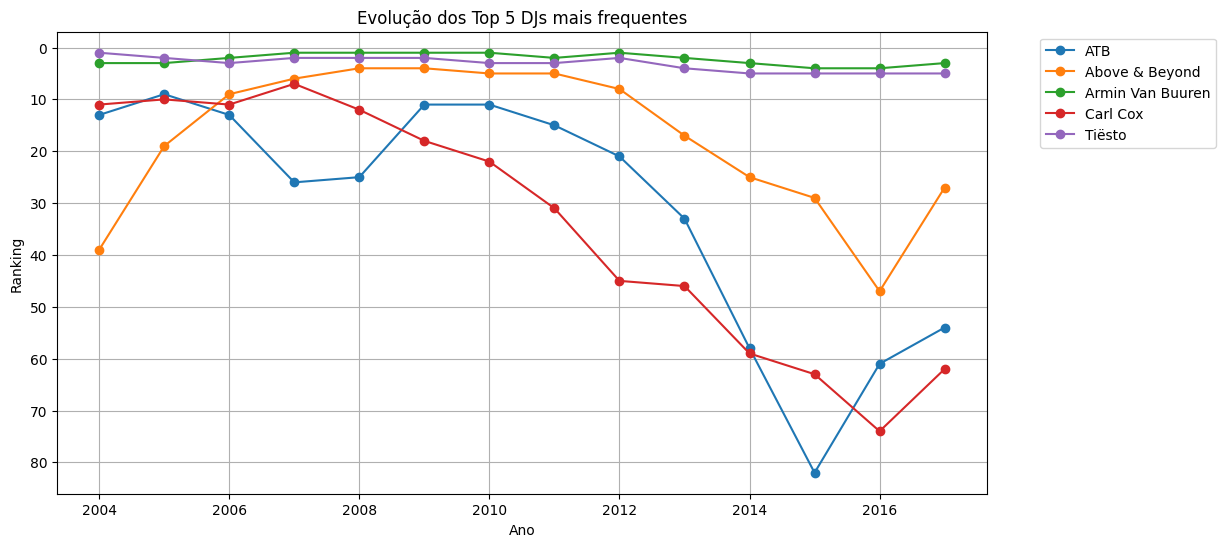

In [45]:
top_5_djs = djs["DJ"].value_counts().head(5).index
df_top5 = djs[djs["DJ"].isin(top_5_djs)]

df_pivot = df_top5.pivot_table(index="Year", columns="DJ", values="Rank", aggfunc="min")

plt.figure(figsize=(12, 6))
plt.plot(df_pivot, marker="o")
plt.title("Evolução dos Top 5 DJs mais frequentes")
plt.xlabel("Ano")
plt.ylabel("Ranking")
plt.gca().invert_yaxis()
plt.legend(df_pivot.columns, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()


In [46]:
djs["Decade"] = (djs["Year"] // 10) * 10  # Criar uma coluna com a década

dominantes_por_decada = djs.groupby("Decade")["DJ"].agg(lambda x: x.value_counts().idxmax())
print(dominantes_por_decada)


Decade
2000              Tiësto
2010    Armin Van Buuren
Name: DJ, dtype: object
